# Mental Health in Tech – EDA & Prediction

In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/organizations/osmi/mental-health-in-tech-survey/survey.csv


In [42]:
# import major libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings 
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv('/kaggle/input/datasets/organizations/osmi/mental-health-in-tech-survey/survey.csv')

#  Problem Understanding

## Background
The **technology industry** is known for its **fast-paced environment**, **long working hours**, and **high-performance expectations**. While **innovation** and **growth** are key strengths of this sector, these conditions may also contribute to increased **stress**, **burnout**, and **mental health challenges** among employees.

In recent years, **mental health awareness** has grown significantly, yet **stigma** and lack of structured **organizational support systems** remain concerns in many companies.

## Objective
The objective of this project is to explore **mental health trends** among **technology professionals** and identify **workplace** and **demographic factors** associated with mental health conditions and **treatment-seeking behavior**.

This analysis aims to uncover patterns related to:
- **Remote work**
- **Company support**
- **Age**
- **Gender**
- **Organizational policies**

## Key Analytical Questions
1. What proportion of tech employees report experiencing **mental health issues**?
2. Does **remote work** influence the likelihood of reporting mental health challenges?
3. How does **company size** and availability of **mental health benefits** impact treatment-seeking behavior?
4. Are certain **demographic groups** more vulnerable?
5. Which **workplace factors** are most strongly associated with mental health risk?

## Business / Organizational Impact
The insights from this analysis can help:

- Organizations design better **mental health policies**
- HR teams create more **supportive work environments**
- Leadership understand key **risk factors**
- Develop **predictive systems** to proactively identify employees who may need support

In [45]:
df.shape

(1259, 27)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

## Data Cleaning

In [48]:
#Handling Missing Values
df.isnull().sum().sort_values(ascending=False)

comments                     1095
state                         515
work_interfere                264
self_employed                  18
Gender                          0
Timestamp                       0
Age                             0
family_history                  0
treatment                       0
no_employees                    0
Country                         0
remote_work                     0
tech_company                    0
care_options                    0
benefits                        0
seek_help                       0
anonymity                       0
leave                           0
wellness_program                0
mental_health_consequence       0
phys_health_consequence         0
supervisor                      0
coworkers                       0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
dtype: int64

### Missing Value Strategy
- Columns with excessive missing values were evaluated.
- For categorical variables → Missing values were filled with 'Unknown' (if appropriate).
- For numerical variables → Missing values were handled using median imputation.

In [49]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['self_employed'].fillna('Unknown', inplace=True)

In [50]:
#Removing Duplicates
df.duplicated().sum()
df = df.drop_duplicates()

- Duplicate records were removed to avoid bias in analysis.

In [51]:
#Standardizing Categorical Values
df['Gender'] = df['Gender'].str.lower()

In [52]:
df['Gender'] = df['Gender'].replace({
    'm': 'male',
    'male ': 'male',
    'cis male': 'male',
    'f': 'female'
})

- Standardized categorical variables to ensure consistent grouping during analysis.

In [53]:
#Handling Outliers
df.Age.describe()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

In [54]:
df = df[(df['Age'] > 15) & (df['Age'] < 70)]

- Unrealistic age values were removed to maintain data validity.

## Exploratory Data Analysis

### Univariate Analysis

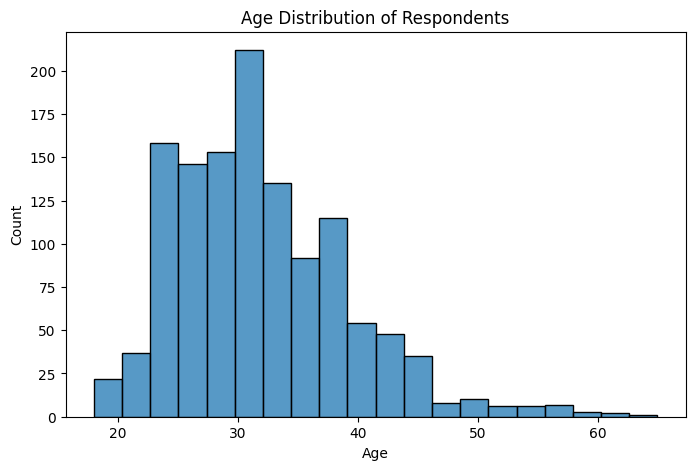

In [55]:
#Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df.Age, bins=20)
plt.title("Age Distribution of Respondents")
plt.show()

### Insights

- Majority of employees are between 25–35 years.
- Tech industry is dominated by young professionals.
- Mental health strategies should target early-career employees.

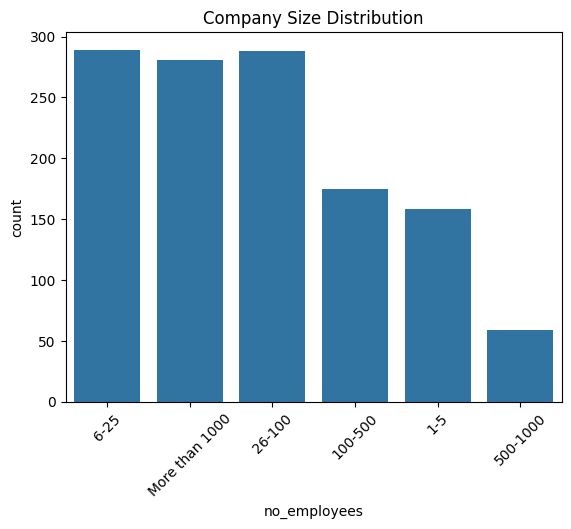

In [56]:
#Company Size Distribution
sns.countplot(x="no_employees", data=df)
plt.xticks(rotation=45)
plt.title("Company Size Distribution")
plt.show()

### Insights

- Most respondents work in small to mid-sized companies (6–500 employees).
- Startups and growing firms dominate tech.
- Mental health policies may vary significantly by company size.

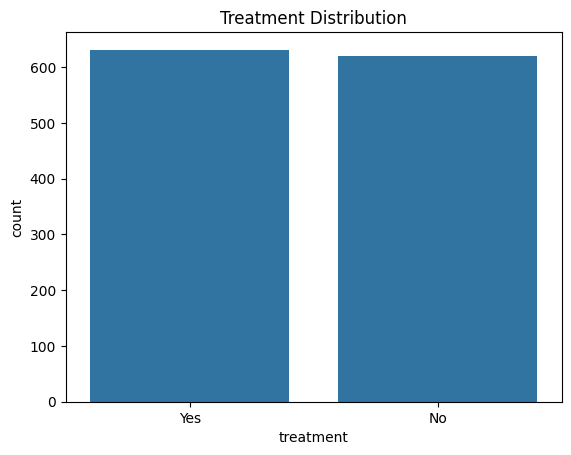

treatment
Yes    50.48
No     49.52
Name: proportion, dtype: float64

In [57]:
#Treatment Distribution
sns.countplot(x="treatment", data=df)
plt.title("Treatment Distribution")
plt.show()

df["treatment"].value_counts(normalize=True) * 100

### Insights

- Nearly 50% of employees have sought treatment.
- Mental health issues are common in the tech industry.
- The dataset is balanced, which is good for classification modeling.

### Bivariate Analysis

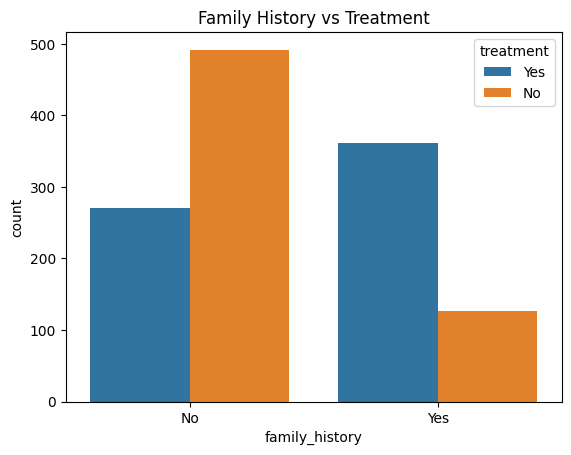

In [58]:
#Treatment vs Family History
sns.countplot(x="family_history", hue="treatment", data=df)
plt.title("Family History vs Treatment")
plt.show()

### Insights

- Employees with family history of mental illness are much more likely to seek treatment.
- Family background is one of the strongest predictors.
- Indicates genetic and environmental influence.

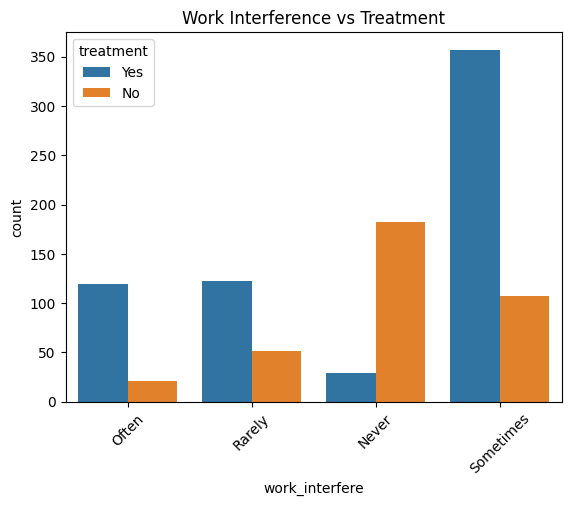

In [59]:
#Treatment vs Work Interference
sns.countplot(x="work_interfere", hue="treatment", data=df)
plt.xticks(rotation=45)
plt.title("Work Interference vs Treatment")
plt.show()

### Insights

- Employees whose mental health often interferes with work show the highest treatment rates.
- Clear positive relationship.
- Work performance impact pushes individuals to seek help.

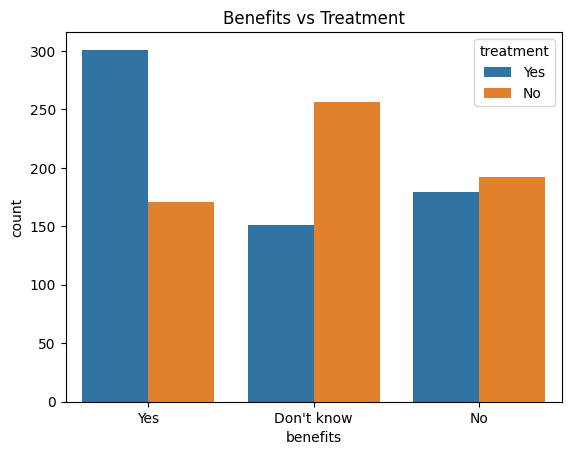

In [60]:
# Treatment vs Benefits
sns.countplot(x="benefits", hue="treatment", data=df)
plt.title("Benefits vs Treatment")
plt.show()

### Insights

- Companies providing mental health benefits see higher treatment rates.
- Organizational support reduces barriers to care.
- Benefits availability encourages help-seeking behavior.

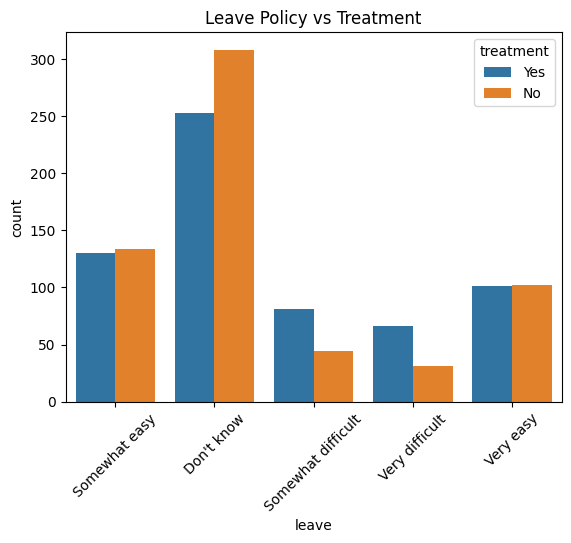

In [61]:
#Treatment vs Leave Policy
sns.countplot(x="leave", hue="treatment", data=df)
plt.xticks(rotation=45)
plt.title("Leave Policy vs Treatment")
plt.show()

### Insights

- Employees who find it easy to take mental health leave are more likely to seek treatment.
- Supportive policies increase psychological safety.
- Strict leave policies may discourage treatment.

### Multivariate Analysis

In [62]:
yes_no_cols = df.columns[df.isin(["Yes","No"]).any()]

for col in yes_no_cols:
    df[col] = df[col].map({"Yes":1, "No":0})

In [63]:
df_encoded = pd.get_dummies(df, drop_first=True)

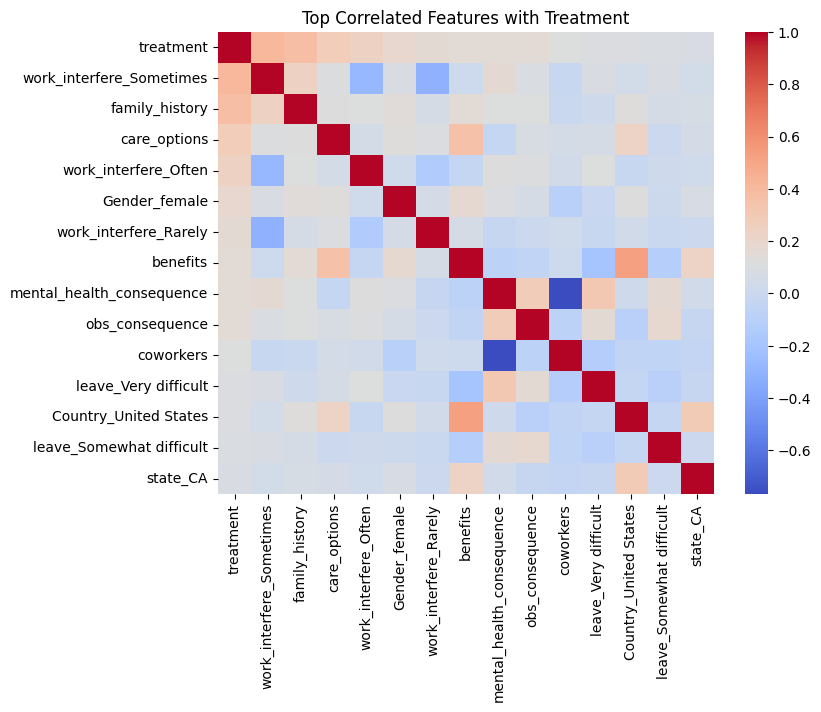

In [64]:
plt.figure(figsize=(8,6))

corr_target = df_encoded.corr()["treatment"].sort_values(ascending=False)

sns.heatmap(
    df_encoded[corr_target.index[:15]].corr(),
    cmap="coolwarm"
)

plt.title("Top Correlated Features with Treatment")
plt.show()

### Insights

- Strong positive correlation:

        family_history ↔ treatment

        work_interfere ↔ treatment

        benefits ↔ seek_help

- Mental health treatment depends on both personal + workplace factors.
- No extreme multicollinearity observed.

##  EDA Summary

- **Mental health treatment is common in tech**  
  → Indicates mental wellness is a widespread workforce issue.

- **Family history is the strongest predictor**  
  → Personal risk factors significantly influence treatment behavior.

- **Work interference increases likelihood of treatment**  
  → Mental health directly impacts productivity and job performance.

- **Company benefits strongly influence help-seeking**  
  → Organizational support reduces barriers to accessing care.

- **Leave flexibility encourages treatment**  
  → Supportive policies improve psychological safety and retention.

- **Small companies may lack structured mental health support**  
  → Startups may need to proactively build wellness frameworks.

- **Organizational culture matters more than location**  
  → Workplace environment plays a greater role than geography in mental health outcomes.

# Final EDA Summary with Business Insights

## Key Findings & Business Impact

- **Mental health treatment is common in tech**  
  → Mental wellness should be treated as a strategic HR priority, not an optional perk.

- **Family history strongly influences treatment behavior**  
  → Early screening and confidential support programs can reduce long-term productivity loss.

- **Work interference increases likelihood of seeking treatment**  
  → Mental health directly impacts performance, deadlines, and overall output quality.

- **Availability of company benefits increases help-seeking**  
  → Providing therapy coverage and Employee Assistance Programs lowers barriers to care.

- **Flexible leave policies encourage treatment**  
  → Supportive leave systems improve employee morale and retention rates.

- **Small companies may lack structured mental health support**  
  → Startups should proactively build wellness frameworks during early growth stages.

- **Organizational culture matters more than geography**  
  → Psychological safety and leadership messaging shape mental health outcomes.

---

## Business Conclusion

Mental health in tech is not just a personal issue — it is a **business performance driver**.  

Organizations that invest in mental health support systems, flexible policies, and stigma-free culture are more likely to see:

- Higher productivity  
- Lower attrition  
- Stronger employer branding  
- Improved long-term workforce sustainability